In [1]:

import pydotplus
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree
import collections
    

#### functon 1

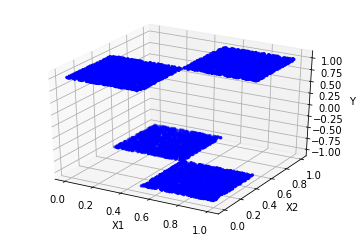

In [2]:
def feature( n ):
    n = 10000
    X = np.random.uniform(low=0,high=1,size=(n,2))
    return X

X = feature(1000)

def response1(X,sigma):
    U1 = 2*(X[:,0]< 0.5)-1
    V1 = 2*(X[:,1] < 0.5)-1
    noise = np.random.normal(0,sigma,len(X))
    Y = U1 * V1 + noise
    return Y

Y = response1(X,0)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0],X[:,1], Y, c = 'b', marker = '.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.show()

  

#### Function 2

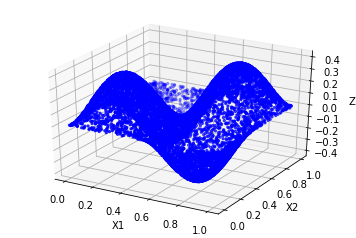

In [3]:
def a(x,y):
    return 100*x*y*(0.5-x)*(0.5-y)

def f(x,y):
    value = 0
    if (0< x<=0.5 and 0< y<=0.5): value = a(x,y)
    elif(0< x  <=0.5 and 0.5< y<= 1): value = - a(x,y - 0.5)
    elif(0.5<x<=1 and 0<y<=0.5): value = - a(x - 0.5, y)
    else: value = a(x - 0.5, y - 0.5)
    
    return value 

def response2(X,sigma):
    Z = []
    for i in range(len(X)):
        Z.append(f(X[i,0],X[i,1]))
    noise = np.random.normal(0,sigma,len(X))
    return Z

Z = response2(X,0)   
    
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0],X[:,1], Z, c = 'b', marker = '.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Z')

plt.show()


In [4]:
def decisionTreeVisual(train_data,train_target):

    clf = tree.DecisionTreeRegressor(max_leaf_nodes = 10, max_depth = 5)
    clf = clf.fit(train_data, train_target)

    # Visualzie data
    from IPython.display import Image 
    from sklearn.tree import export_graphviz 
    import pydotplus

    dot_data = tree.export_graphviz(clf, feature_names = list(["X1","X2"]),
                               out_file = None,
                               filled = True,
                               rounded = True)

    graph = pydotplus.graph_from_dot_data(dot_data)

    colors = ('turquoise', 'green')
    edges = collections.defaultdict(list)
    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))
    
    for edge in edges:
        edges[edge].sort()
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]
            dest.set_fillcolor(colors[i])
    Image(graph.create_png())
    
decisionTreeVisual(X,Y)
print("cool!")
decisionTreeVisual(X,Z)

cool!


#### decision tree visualization

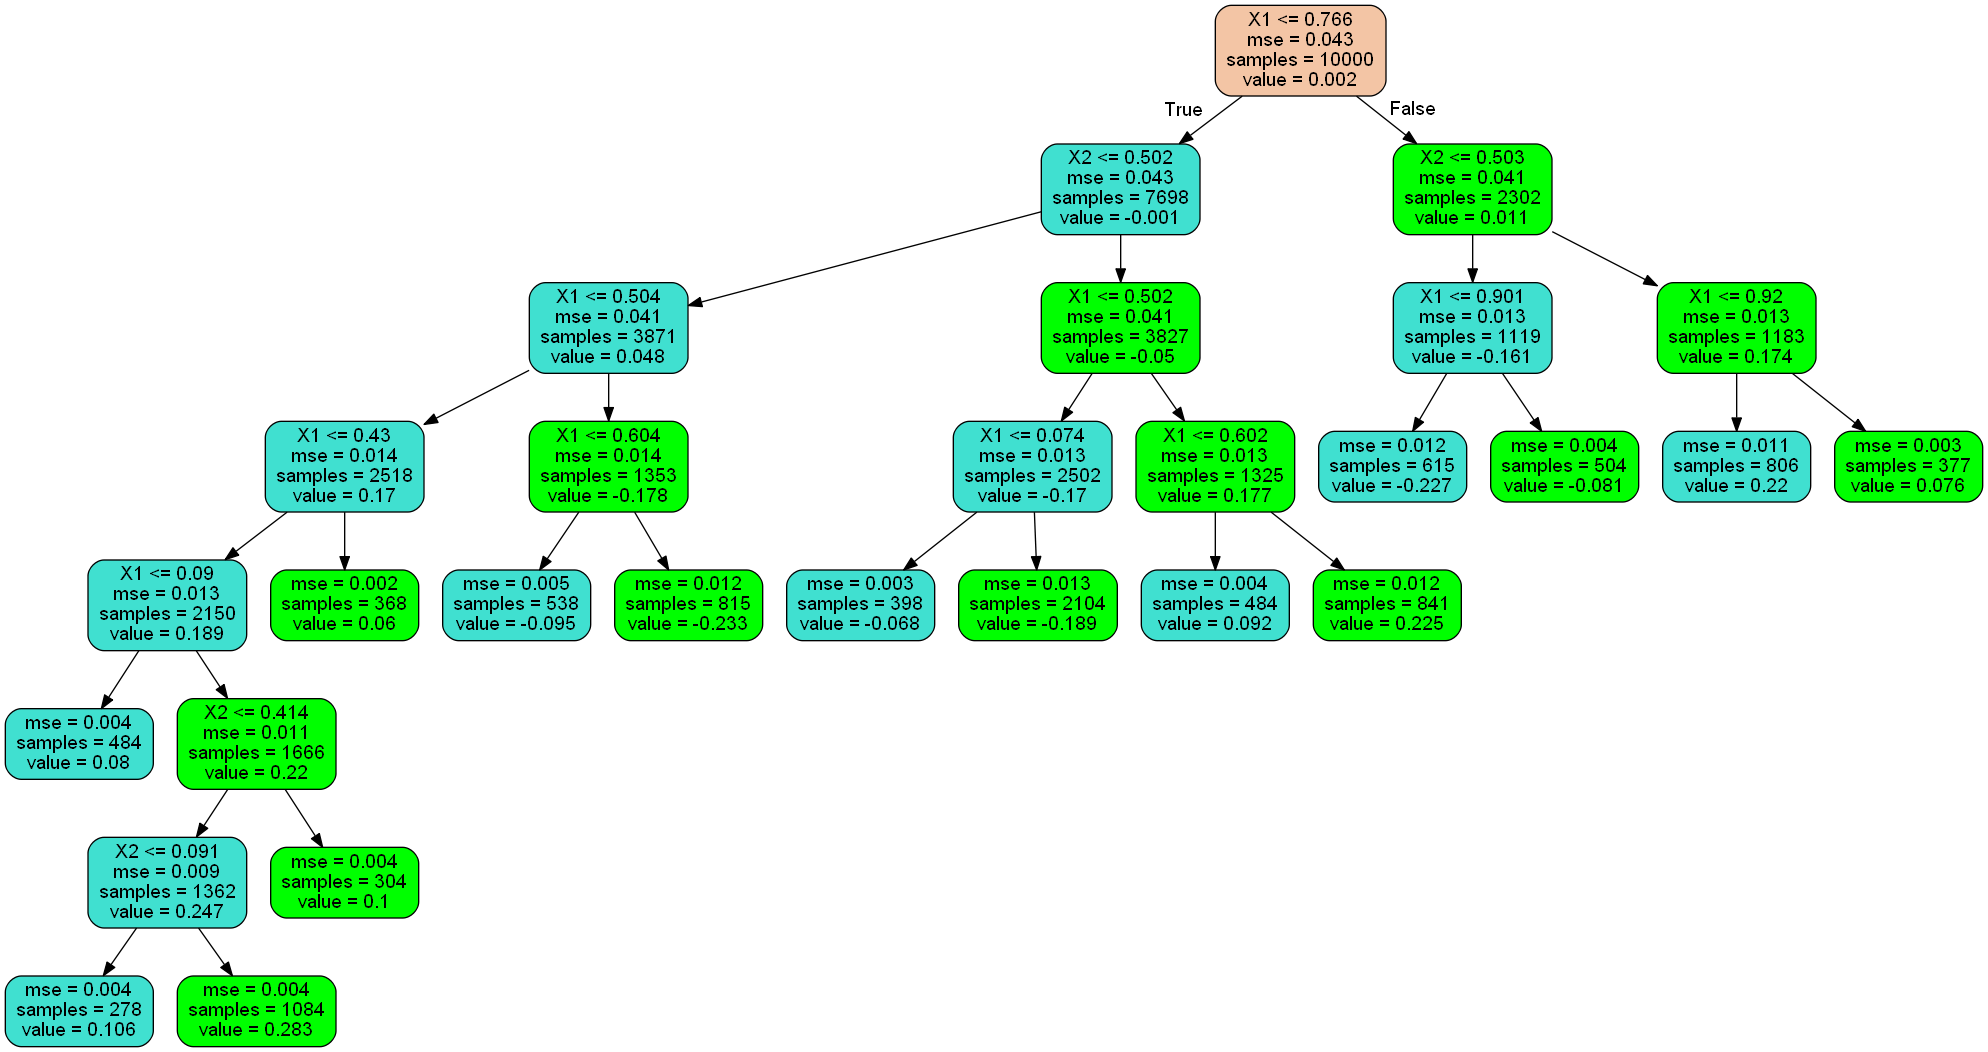

In [9]:
n = 1000000
X = feature(n); Y = response1(X,0); Z= response2(X,0)
train_data = X
train_target = Z

clf = tree.DecisionTreeRegressor(max_leaf_nodes = 15, max_depth = 6)
clf = clf.fit(train_data, train_target)

# Visualzie data


from IPython.display import Image 
from sklearn.tree import export_graphviz 
import pydotplus

dot_data = tree.export_graphviz(clf, feature_names = ['X1','X2'],
                               out_file = None,
                               filled = True,
                               rounded = True)

graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'green')
edges = collections.defaultdict(list)
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
    
for edge in edges:
    edges[edge].sort()
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
        
Image(graph.create_png())